## Installation and Setup

In [1]:
!pip install ultralytics

In [2]:
import requests
import zipfile
import os
import glob
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np

## Download the Dataset


In [3]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [4]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [5]:
download_file(
    'https://www.dropbox.com/s/ievh0sesad015z0/trash_inst_material.zip?dl=1',
    'trash_inst_material.zip'
)
    
unzip(zip_file='trash_inst_material.zip')

Extracted all


## YOLO Dataset Label Format

All the labels are available in the corresponding text files inside the `labels` directories. Modern YOLO models use the following format in the text files.

`<class_number, x_center, y_center, normalized_width, normalized_height>`

The `class_number` ranges from `0` to the `num_classes-1`. So, if there are 16 classes in the dataset, the `class_number` will range from 0-15.

We will visit this again while preparing dataset YAML file.

## Model YAML File

In this section, we prepare the model YAML file. We have already covered the explanation of the YOLO YAML file in the YOLOv8 basic training notebook.

To reiterate, the YAML contains the paths to the different dataset splits and the class names.

In [6]:
cwd = os.getcwd()
print(cwd)

/workspace


In [7]:
import yaml

attr = {
    'path': cwd+'/trash_inst_material',
    'train': 'train/images',
    'val': 'val/images',
    
    'names': {
        0: 'rov', 
        1: 'plant', 
        2: 'animal_fish', 
        3: 'animal_starfish', 
        4: 'animal_shells', 
        5: 'animal_crab', 
        6: 'animal_eel', 
        7: 'animal_etc', 
        8: 'trash_etc',
        9: 'trash_fabric', 
        10: 'trash_fishing_gear', 
        11: 'trash_metal', 
        12: 'trash_paper', 
        13: 'trash_plastic', 
        14: 'trash_rubber', 
        15: 'trash_wood', 
    }
}

In [8]:
with open('trashcan_inst_material.yaml', 'w') as f:
    yaml.dump(attr, f)

## YOLOv8 Training

We will train three different models here, namely, **YOLOv8n**, **YOLOv8s**, and **YOLov8m** models.

Running three different training experiments will give is an idea how models of different scales perform on complex datasets. 

After training, we will also run inference on images and videos using the best performing model. 

### YOLOv8 Nano Segmentation Model Training

In [9]:
EPOCHS = 5
!yolo \
task=segment \
mode=train \
model=yolov8n-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8n-seg \
exist_ok=True \
amp=False

New https://pypi.org/project/ultralytics/8.0.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.66 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA RTX A5000, 24256MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=trashcan_inst_material.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n-seg, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classe

The above are the results on the validation set. Let's run evaluation of the test set and check the mAP values. We need to use the `val` mode for this.

With the Small model, we get an mAP of 51.7 at IoU 0.50-0.95.

### YOLOv8s Training

In [10]:
EPOCHS = 5
!yolo \
task=detect \
mode=train \
model=yolov8s-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8s-seg \
exist_ok=True \
amp=False

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.0.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.66 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA RTX A5000, 24256MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=trashcan_inst_material.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s-seg, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, 

### YOLOv8m Training

In [11]:
EPOCHS = 5
!yolo \
task=detect \
mode=train \
model=yolov8m-seg.pt \
imgsz=640 \
data=trashcan_inst_material.yaml \
epochs={EPOCHS} \
batch=16 \
name=yolov8m-seg \
exist_ok=True \
amp=False

WARNING ⚠️ conflicting 'task=detect' passed with 'task=segment' model. Ignoring 'task=detect' and updating to 'task=segment' to match model.
New https://pypi.org/project/ultralytics/8.0.91 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.66 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA RTX A5000, 24256MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=trashcan_inst_material.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8m-seg, exist_ok=True, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, 

We get the best results using the YOLOv8m model. We have a box mAP of almost 50 and mask mAP of 37.8 which is pretty good.

## Image Inference

As we have the trained models now, let's use the best model for running inference on some images.

In [12]:
# Download the inference data.
download_file(
    'https://www.dropbox.com/s/smdsotzz5al3bi2/trash_segment_inference_data.zip?dl=1',
    'trash_segment_inference_data.zip'
)
    
unzip(zip_file='trash_segment_inference_data.zip')

Extracted all


Before that, following is a simple image visualization function.

In [13]:
# Plot and visualize images in a 2x2 grid.
def visualize(result_dir):
    """
    Function accepts a list of images and plots
    them in either a 1x1 grid or 2x2 grid.
    """
    image_names = glob.glob(os.path.join(result_dir, '*.jpg'))
    if len(image_names) < 4:
        plt.figure(figsize=(10, 7))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(1, 1, i+1)
            plt.imshow(image)
            plt.axis('off')
            break
    if len(image_names) >= 4:
        plt.figure(figsize=(15, 12))
        for i, image_name in enumerate(image_names):
            image = plt.imread(image_name)
            plt.subplot(2, 2, i+1)
            plt.imshow(image)
            plt.axis('off')
            if i == 3:
                break
    plt.tight_layout()
    plt.show()

In [17]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_inst_material/val/images/' \
name='yolov8m_predict' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.66 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA RTX A5000, 24256MiB)
YOLOv8m-seg summary (fused): 245 layers, 27231648 parameters, 0 gradients, 110.0 GFLOPs

image 1/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000013.jpg: 384x640 1 trash_etc, 1 trash_plastic, 41.8ms
image 2/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000014.jpg: 384x640 1 trash_etc, 1 trash_plastic, 27.3ms
image 3/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000015.jpg: 384x640 1 trash_etc, 1 trash_plastic, 24.2ms
image 4/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000016.jpg: 384x640 1 trash_plastic, 25.7ms
image 5/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000017.jpg: 384x640 1 trash_metal, 1 trash_plastic, 24.6ms
image 6/1204 /workspace/trash_inst_material/val/images/vid_000002_frame0000018.jpg: 384x640 1 trash_etc, 1 trash_plastic, 24.9ms
image 7/1204 /workspace/trash_inst_material/val/images/vid_

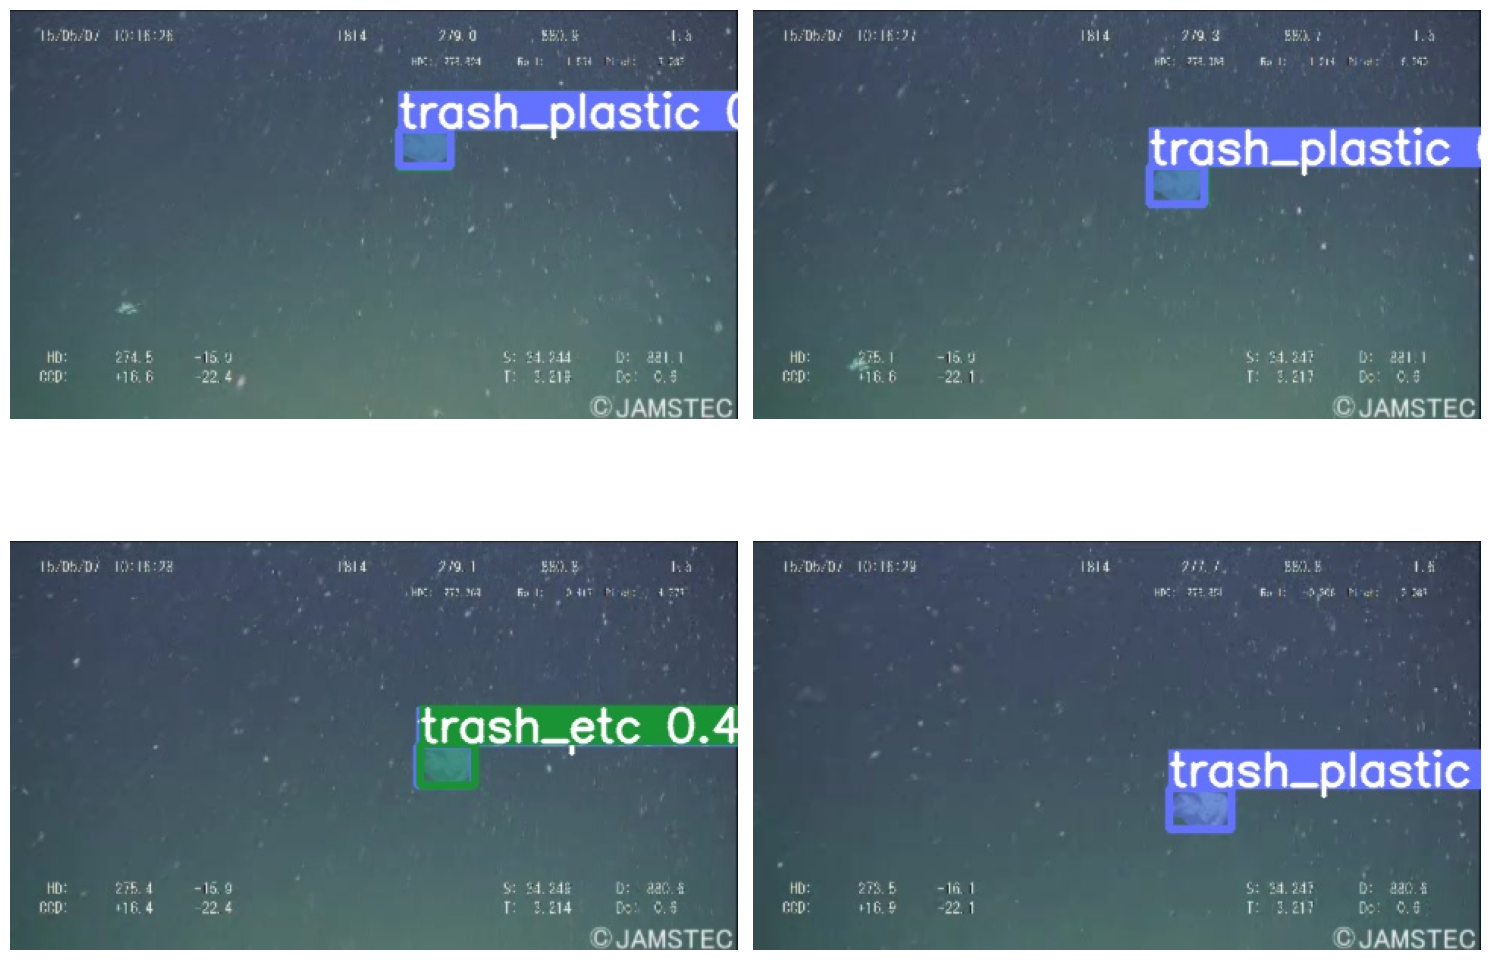

In [18]:
visualize('runs/segment/yolov8m_predict')

## Inference on Videos

For one final testing, let's run inference on videos.

In [16]:
!yolo predict \
model='runs/segment/yolov8m-seg/weights/best.pt' \
source='trash_segment_inference_data/manythings.mp4' \
name='yolov8m_predict_videos1' \
exist_ok=True \
save=True

Ultralytics YOLOv8.0.66 🚀 Python-3.10.8 torch-1.13.1 CUDA:0 (NVIDIA RTX A5000, 24256MiB)
YOLOv8m-seg summary (fused): 245 layers, 27231648 parameters, 0 gradients, 110.0 GFLOPs

video 1/1 (1/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 2 trash_plastics, 1 trash_wood, 44.8ms
video 1/1 (2/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 1 rov, 1 trash_metal, 1 trash_plastic, 26.2ms
video 1/1 (3/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 2 trash_etcs, 1 trash_metal, 1 trash_plastic, 25.7ms
video 1/1 (4/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 1 trash_plastic, 27.2ms
video 1/1 (5/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 1 trash_metal, 1 trash_plastic, 25.8ms
video 1/1 (6/1168) /workspace/trash_segment_inference_data/manythings.mp4: 480x640 1 trash_etc, 1 trash_metal, 24.4ms
video 1/1 (7/1168) /workspace/trash_segment_inference_data/man

Even the Extra Large model, is running at more than 28 FPS on the Tesla T4 GPU which is more than real-time. This is really impressive.